# Exploratory Data Analysis on Delivery Time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df=pd.read_csv("Food_Time_Data_Set.csv")

In [109]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Unnamed: 14,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,11B4,VADRES13DEL03,32.0,4.2,22.310237,73.158921,22.400237,73.248921,Meal,motorcycle,23.96,64.0,0.0,haze,NaN,High,18.92,32.61666667
9997,8336,HYDRES20DEL01,36.0,4.7,17.483216,78.552111,17.493216,78.562111,Meal,motorcycle,22.94,60.0,0.0,haze,NaN,Low,2.64,12.01666667
9998,338B,JAPRES18DEL03,37.0,4.6,26.913987,75.752891,27.053987,75.892891,Buffet,scooter,23.72,31.0,0.0,clear sky,NaN,Very High,28.80,51.06666667
9999,3FB2,MUMRES11DEL03,29.0,4.7,18.994237,72.825553,19.084237,72.915553,Meal,scooter,28.01,57.0,0.0,smoke,NaN,High,17.63,43.8


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9035 entries, 1 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          9035 non-null   float64
 1   Delivery_person_Ratings      9035 non-null   float64
 2   Restaurant_latitude          9035 non-null   float64
 3   Restaurant_longitude         9035 non-null   float64
 4   Delivery_location_latitude   9035 non-null   float64
 5   Delivery_location_longitude  9035 non-null   float64
 6   Type_of_order                9035 non-null   object 
 7   Type_of_vehicle              9035 non-null   object 
 8   temperature                  9035 non-null   float64
 9   humidity                     9035 non-null   float64
 10  precipitation                9035 non-null   float64
 11  weather_description          9035 non-null   object 
 12  Traffic_Level                9035 non-null   object 
 13  Distance (km)          

In [89]:
df.shape

(10001, 18)

In [68]:
columns_to_drop=['ID','Delivery_person_ID','Unnamed: 14']
df=df.drop(columns=columns_to_drop)

In [71]:
df.dropna(inplace=True)

In [84]:
target=df['TARGET']
df2=df.drop(columns='TARGET')

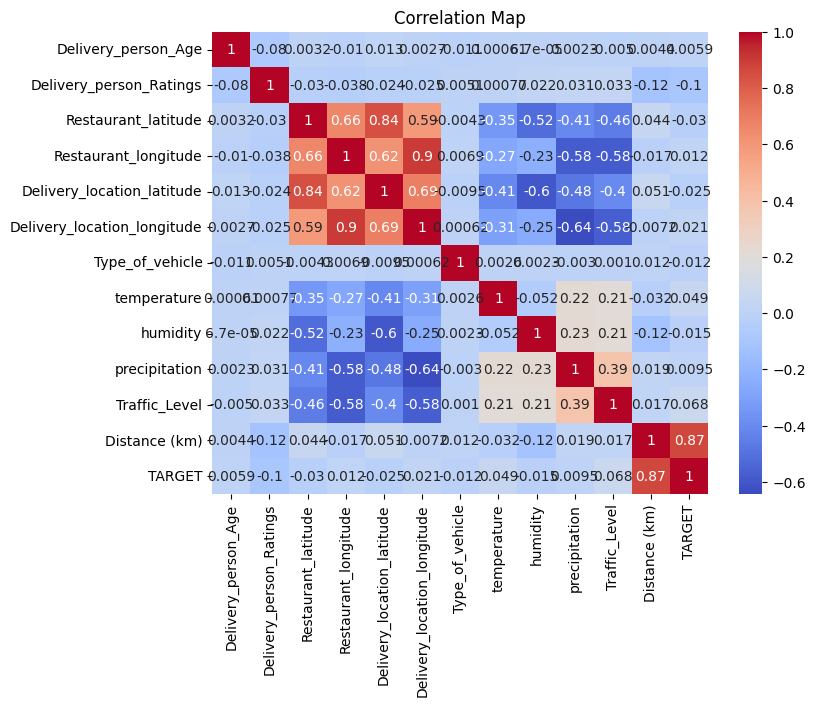

In [217]:
numbers=df.select_dtypes(include=[np.number]).drop(columns='Unnamed: 14')
plt.figure(figsize=(8,6))
plt.title("Correlation Map")
sns.heatmap(numbers.corr(),annot=True,cmap='coolwarm')
plt.show()

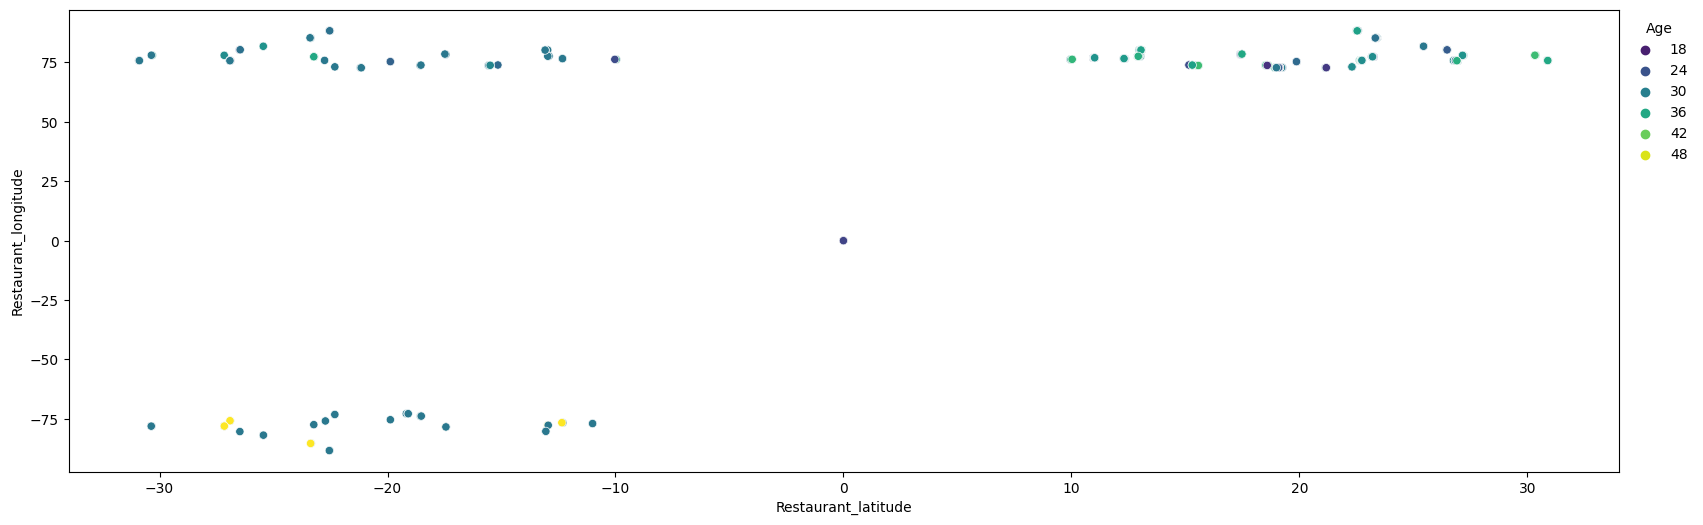

In [127]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=df.Restaurant_latitude, y=df.Restaurant_longitude, hue=df.Delivery_person_Age, palette='viridis')
plt.legend(title='Age', loc='upper left' , bbox_to_anchor=(1,1), frameon=False, fontsize=10)

Text(0, 0.5, 'Count')

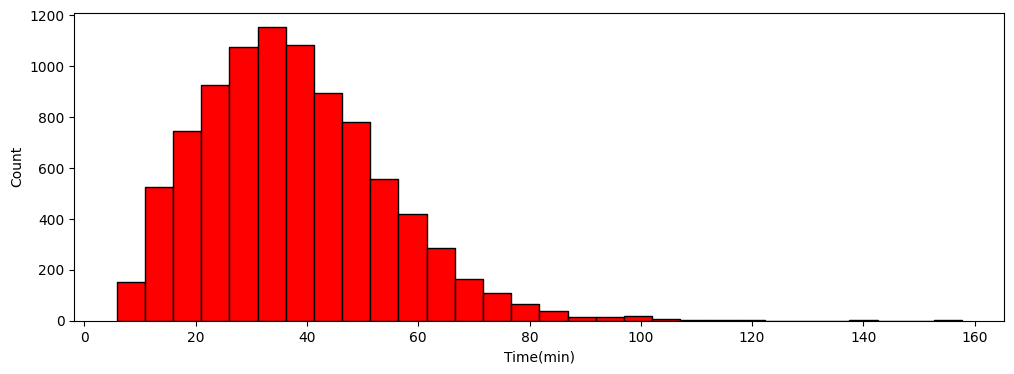

In [119]:
plt.figure(figsize=(12,4))
df['TARGET']=pd.to_numeric(df["TARGET"], errors='coerce')
plt.hist((df['TARGET']),edgecolor='black',color='red',bins=30)
plt.xlabel("Time(min)")
plt.ylabel("Count")

Text(0.5, 0, 'Time(min)')

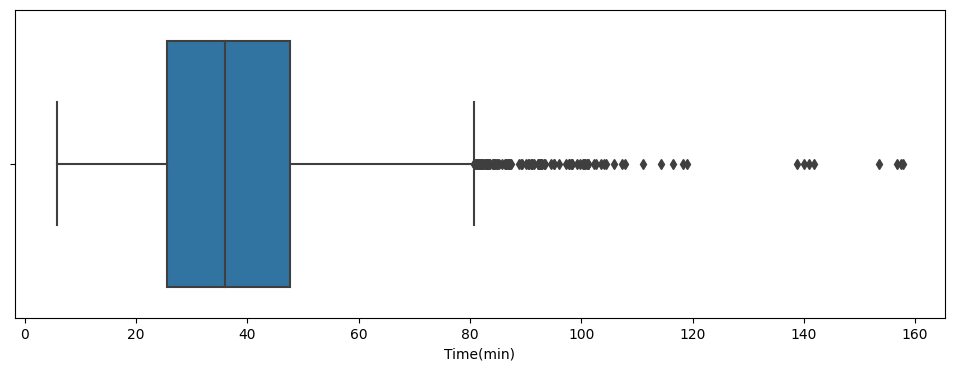

In [124]:
plt.figure(figsize=(12,4))
df['TARGET']=pd.to_numeric(df["TARGET"], errors='coerce')
sns.boxplot(x=(df['TARGET']))
plt.xlabel("Time(min)")

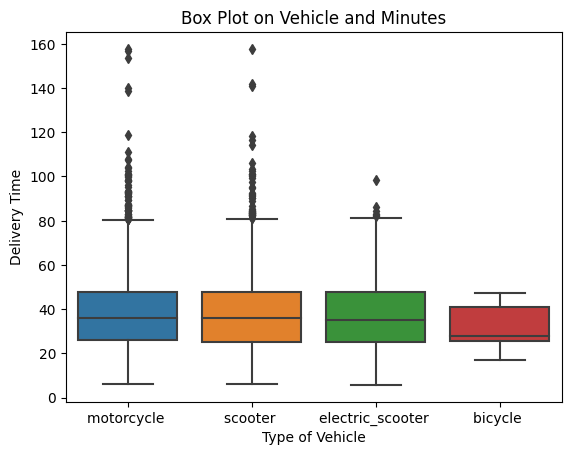

In [126]:
sns.boxplot(data=df, x='Type_of_vehicle', y='TARGET')
plt.title("Box Plot on Vehicle and Minutes")
plt.xlabel('Type of Vehicle')
plt.ylabel('Delivery Time')
plt.show()

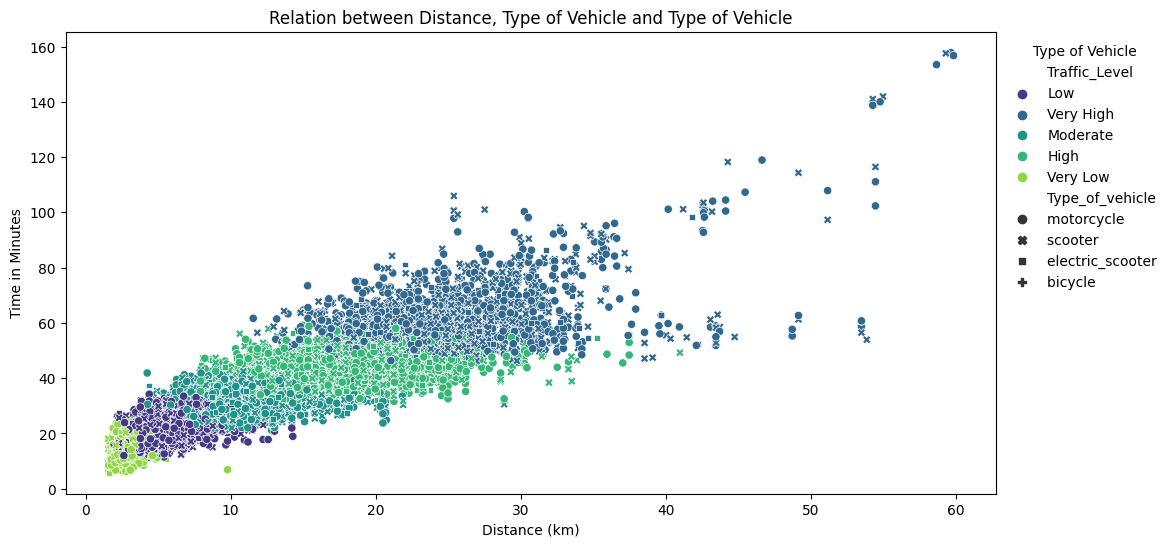

In [129]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Distance (km)', y='TARGET', hue='Traffic_Level', style='Type_of_vehicle', palette='viridis')
plt.title('Relation between Distance, Type of Vehicle and Type of Vehicle')
plt.xlabel('Distance (km)')
plt.ylabel('Time in Minutes')
plt.legend(title='Type of Vehicle', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()

In [158]:
from sklearn.preprocessing import LabelEncoder
tv=LabelEncoder()
tf=LabelEncoder()
temp=LabelEncoder()
df2.Type_of_vehicle=tv.fit_transform(df2['Type_of_order'])
df2.Traffic_Level=tf.fit_transform(df2['Traffic_Level'])
df2.weather_description=temp.fit_transform(df2['weather_description'])

In [157]:
df2.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'temperature', 'humidity', 'precipitation', 'weather_description',
       'Traffic_Level', 'Distance (km)'],
      dtype='object')

In [200]:
x=df2[['Delivery_person_Age','weather_description','temperature','humidity','Type_of_vehicle','Traffic_Level','Restaurant_longitude','Delivery_location_latitude', 'Restaurant_latitude', 'Delivery_location_longitude','Distance (km)']]
y=target

In [219]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.1)

In [176]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [177]:
model.score(x_test,y_test)

0.7825937914600503

In [209]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=10)

In [210]:
def get_score(model, x_train, y_train, x_test, y_test):
    model.fit(x_train,y_train)
    return model.score(x_test, y_test)

In [211]:
scores=[]
for train_index,test_index in kf.split(x,target):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index] , y[train_index] , y[test_index]
    scores.append(get_score(LinearRegression(), x_train, y_train, x_test, y_test))

C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [213]:
np.array(scores).mean()

0.781377026120361